In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('../data/penguins_size.csv')
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
X = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)
y = df['species']
print(X.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
4              36.7             19.3              193.0       3450.0   
5              39.3             20.6              190.0       3650.0   

   island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0         False              True       False      True  
1         False              True        True     False  
2         False              True        True     False  
4         False              True        True     False  
5         False              True       False      True  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt', random_state = 101)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

In [8]:
rfc.feature_importances_

array([0.28453952, 0.13104122, 0.23902164, 0.13981737, 0.1521643 ,
       0.04776078, 0.00315328, 0.0025019 ])

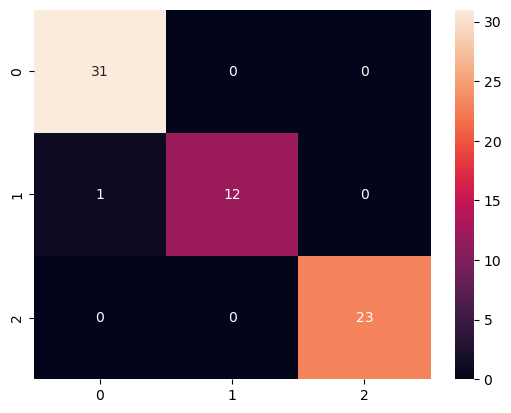

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot = True, fmt = 'd');

In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        31
   Chinstrap       1.00      0.92      0.96        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [11]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")
X = df.drop("Class",axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [17]:
predictions = grid.predict(X_test)

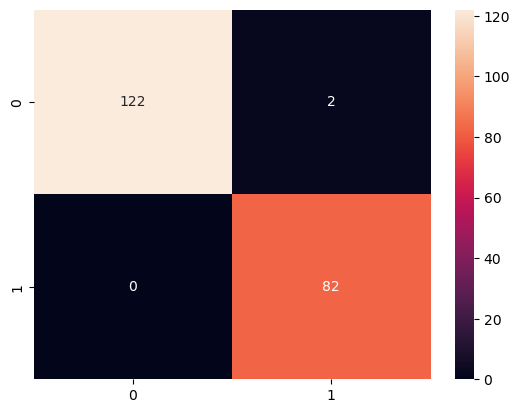

In [19]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd');

In [20]:
print(grid.best_estimator_.oob_score_, grid.best_params_)

0.9931389365351629 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

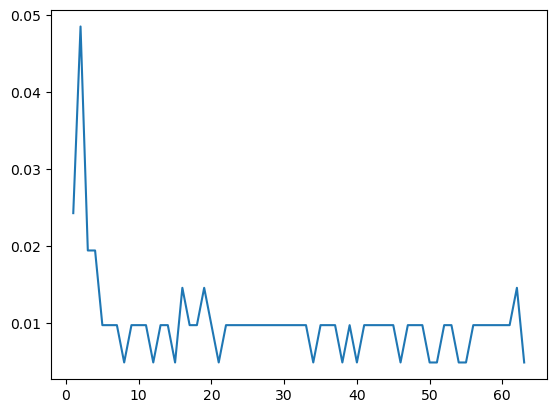

In [27]:
plt.plot(range(1,64),errors);

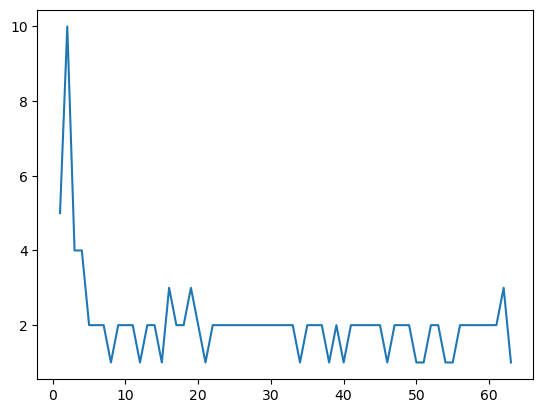

In [26]:
plt.plot(range(1,64),misclassifications);